In [103]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import pandas as pd
from xgboost import XGBClassifier

In [3]:
sp500 = yf.Ticker("^GSPC")

In [4]:
sp500 = sp500.history(period="max")

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-07-29 00:00:00-04:00,6405.620117,6409.259766,6363.919922,6370.859863,5076120000,0.0,0.0
2025-07-30 00:00:00-04:00,6381.229980,6396.540039,6336.379883,6362.899902,5375070000,0.0,0.0
2025-07-31 00:00:00-04:00,6427.020020,6427.020020,6327.640137,6339.390137,6077080000,0.0,0.0


In [6]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-07-22 00:00:00-04:00', '2025-07-23 00:00:00-04:00',
               '2025-07-24 00:00:00-04:00', '2025-07-25 00:00:00-04:00',
               '2025-07-28 00:00:00-04:00', '2025-07-29 00:00:00-04:00',
               '2025-07-30 00:00:00-04:00', '2025-07-31 00:00:00-04:00',
               '2025-08-01 00:00:00-04:00', '2025-08-04 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24513, freq=None)

# Cleaning and Visualizing

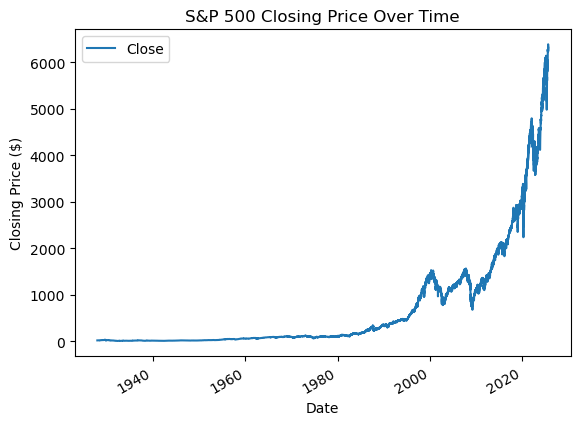

In [8]:
sp500.plot.line(y="Close",use_index=True)
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.title("S&P 500 Closing Price Over Time")
plt.show()

In [9]:
#del sp500["Dividends"] #run once
#del sp500["Stock Splits"] #run once
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2025-07-29 00:00:00-04:00,6405.620117,6409.259766,6363.919922,6370.859863,5076120000
2025-07-30 00:00:00-04:00,6381.229980,6396.540039,6336.379883,6362.899902,5375070000
2025-07-31 00:00:00-04:00,6427.020020,6427.020020,6327.640137,6339.390137,6077080000


# Setting Target

In [11]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-07-29 00:00:00-04:00,6405.620117,6409.259766,6363.919922,6370.859863,5076120000,6362.899902
2025-07-30 00:00:00-04:00,6381.229980,6396.540039,6336.379883,6362.899902,5375070000,6339.390137
2025-07-31 00:00:00-04:00,6427.020020,6427.020020,6327.640137,6339.390137,6077080000,6238.009766


In [12]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-07-29 00:00:00-04:00,6405.620117,6409.259766,6363.919922,6370.859863,5076120000,6362.899902,0
2025-07-30 00:00:00-04:00,6381.229980,6396.540039,6336.379883,6362.899902,5375070000,6339.390137,0
2025-07-31 00:00:00-04:00,6427.020020,6427.020020,6327.640137,6339.390137,6077080000,6238.009766,0


In [13]:
sp500 = sp500.loc["1989-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1989-01-03 00:00:00-05:00,277.720001,277.720001,273.809998,275.309998,128500000,279.429993,1
1989-01-04 00:00:00-05:00,275.309998,279.750000,275.309998,279.429993,149700000,280.010010,1
1989-01-05 00:00:00-05:00,279.429993,281.510010,279.429993,280.010010,174040000,280.670013,1
1989-01-06 00:00:00-05:00,280.010010,282.059998,280.010010,280.670013,161330000,280.980011,1
1989-01-09 00:00:00-05:00,280.670013,281.890015,280.320007,280.980011,163180000,280.380005,0
...,...,...,...,...,...,...,...
2025-07-29 00:00:00-04:00,6405.620117,6409.259766,6363.919922,6370.859863,5076120000,6362.899902,0
2025-07-30 00:00:00-04:00,6381.229980,6396.540039,6336.379883,6362.899902,5375070000,6339.390137,0
2025-07-31 00:00:00-04:00,6427.020020,6427.020020,6327.640137,6339.390137,6077080000,6238.009766,0


# Initial Machine Learning Model

In [15]:
model  = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [16]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
preds

Date
2025-03-12 00:00:00-04:00    0
2025-03-13 00:00:00-04:00    0
2025-03-14 00:00:00-04:00    0
2025-03-17 00:00:00-04:00    0
2025-03-18 00:00:00-04:00    1
                            ..
2025-07-29 00:00:00-04:00    0
2025-07-30 00:00:00-04:00    0
2025-07-31 00:00:00-04:00    0
2025-08-01 00:00:00-04:00    0
2025-08-04 00:00:00-04:00    0
Length: 100, dtype: int32

In [17]:
precision_score(test["Target"], preds)

0.5873015873015873

<Axes: xlabel='Date'>

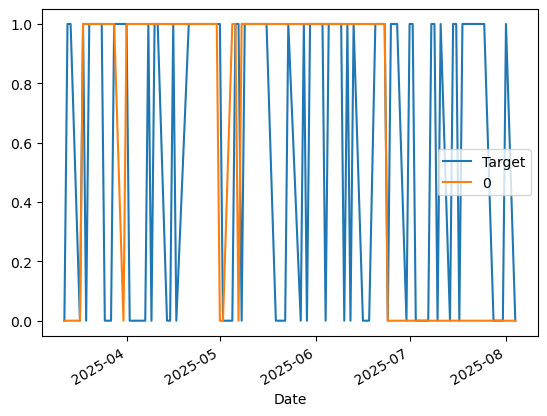

In [18]:
combined = pd.concat([test["Target"],preds], axis=1)
combined.plot()

In [19]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"],preds], axis=1)
    return combined

In [20]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [21]:
predictions = backtest(sp500, model, predictors)

In [22]:
predictions["Predictions"].value_counts()

Predictions
0    3918
1    2797
Name: count, dtype: int64

In [23]:
precision_score(predictions["Target"], predictions["Predictions"])

0.532713621737576

In [24]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.535666
0    0.464334
Name: count, dtype: float64

In [25]:
horizons = [2,50,60,250,1000]
new_predictors = []
for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    new_predictors += [ratio_column,trend_column]

In [26]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_50,Trend_50,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1989-01-03 00:00:00-05:00,277.720001,277.720001,273.809998,275.309998,128500000,279.429993,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-01-04 00:00:00-05:00,275.309998,279.750000,275.309998,279.429993,149700000,280.010010,1,1.007427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-01-05 00:00:00-05:00,279.429993,281.510010,279.429993,280.010010,174040000,280.670013,1,1.001037,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-01-06 00:00:00-05:00,280.010010,282.059998,280.010010,280.670013,161330000,280.980011,1,1.001177,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-01-09 00:00:00-05:00,280.670013,281.890015,280.320007,280.980011,163180000,280.380005,0,1.000552,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-29 00:00:00-04:00,6405.620117,6409.259766,6363.919922,6370.859863,5076120000,6362.899902,0,0.998518,1.0,1.043016,30.0,1.053485,37.0,1.093257,144.0,1.332944,532.0
2025-07-30 00:00:00-04:00,6381.229980,6396.540039,6336.379883,6362.899902,5375070000,6339.390137,0,0.999375,0.0,1.040335,29.0,1.050211,36.0,1.091197,144.0,1.330733,532.0
2025-07-31 00:00:00-04:00,6427.020020,6427.020020,6327.640137,6339.390137,6077080000,6238.009766,0,0.998149,0.0,1.035219,28.0,1.044352,36.0,1.086557,143.0,1.325286,531.0


In [27]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [28]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"],preds], axis=1)
    print(combined)
    return combined

In [29]:
predictions = backtest(sp500, model, new_predictors)
print(predictions)

                           Target  Predictions
Date                                          
1998-11-20 00:00:00-05:00       1          0.0
1998-11-23 00:00:00-05:00       0          0.0
1998-11-24 00:00:00-05:00       1          0.0
1998-11-25 00:00:00-05:00       1          0.0
1998-11-27 00:00:00-05:00       0          0.0
...                           ...          ...
1999-11-11 00:00:00-05:00       1          0.0
1999-11-12 00:00:00-05:00       0          0.0
1999-11-15 00:00:00-05:00       1          0.0
1999-11-16 00:00:00-05:00       0          0.0
1999-11-17 00:00:00-05:00       1          0.0

[250 rows x 2 columns]
                           Target  Predictions
Date                                          
1999-11-18 00:00:00-05:00       0          0.0
1999-11-19 00:00:00-05:00       0          0.0
1999-11-22 00:00:00-05:00       0          0.0
1999-11-23 00:00:00-05:00       1          1.0
1999-11-24 00:00:00-05:00       0          0.0
...                           ...   

In [30]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5587975243147657

In [31]:
predictions["Predictions"].value_counts()

Predictions
0.0    5584
1.0    1131
Name: count, dtype: int64

In [57]:
sp500["Volatility_20"] = sp500["Close"].pct_change().rolling(20).std()
new_predictors.append("Volatility_20")

In [65]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

predictions = backtest(sp500, model, new_predictors)
print(predictions)

                           Target  Predictions
Date                                          
1998-11-20 00:00:00-05:00       1          1.0
1998-11-23 00:00:00-05:00       0          0.0
1998-11-24 00:00:00-05:00       1          0.0
1998-11-25 00:00:00-05:00       1          0.0
1998-11-27 00:00:00-05:00       0          0.0
...                           ...          ...
1999-11-11 00:00:00-05:00       1          0.0
1999-11-12 00:00:00-05:00       0          0.0
1999-11-15 00:00:00-05:00       1          0.0
1999-11-16 00:00:00-05:00       0          0.0
1999-11-17 00:00:00-05:00       1          0.0

[250 rows x 2 columns]
                           Target  Predictions
Date                                          
1999-11-18 00:00:00-05:00       0          0.0
1999-11-19 00:00:00-05:00       0          0.0
1999-11-22 00:00:00-05:00       0          0.0
1999-11-23 00:00:00-05:00       1          1.0
1999-11-24 00:00:00-05:00       0          0.0
...                           ...   

In [66]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5465393794749404

In [80]:
# new_predictors.remove("Volatility_20") #run once
# del sp500["Volatility_20"] #run once

ValueError: list.remove(x): x not in list

In [83]:
sp500["Momentum_10"] = sp500["Close"] - sp500["Close"].shift(10)
new_predictors.append("Momentum_10")

In [82]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

predictions = backtest(sp500, model, new_predictors)
print(predictions)

                           Target  Predictions
Date                                          
1998-11-20 00:00:00-05:00       1          0.0
1998-11-23 00:00:00-05:00       0          0.0
1998-11-24 00:00:00-05:00       1          0.0
1998-11-25 00:00:00-05:00       1          0.0
1998-11-27 00:00:00-05:00       0          0.0
...                           ...          ...
1999-11-11 00:00:00-05:00       1          0.0
1999-11-12 00:00:00-05:00       0          0.0
1999-11-15 00:00:00-05:00       1          0.0
1999-11-16 00:00:00-05:00       0          0.0
1999-11-17 00:00:00-05:00       1          0.0

[250 rows x 2 columns]
                           Target  Predictions
Date                                          
1999-11-18 00:00:00-05:00       0          0.0
1999-11-19 00:00:00-05:00       0          0.0
1999-11-22 00:00:00-05:00       0          0.0
1999-11-23 00:00:00-05:00       1          1.0
1999-11-24 00:00:00-05:00       0          0.0
...                           ...   

In [84]:
precision_score(predictions["Target"], predictions["Predictions"])

0.549558390578999

In [109]:
#new_predictors.remove("Momentum_10") #run once
#del sp500["Momentum_10"] #run once

KeyError: 'Momentum_10'

In [111]:
model = XGBClassifier(n_estimators=200, learning_rate=.1, use_label_encoder=False, eval_metric='logloss', random_state=1)
predictions = backtest(sp500, model, new_predictors)
print(predictions)

C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
1998-11-20 00:00:00-05:00       1          1.0
1998-11-23 00:00:00-05:00       0          1.0
1998-11-24 00:00:00-05:00       1          0.0
1998-11-25 00:00:00-05:00       1          0.0
1998-11-27 00:00:00-05:00       0          1.0
...                           ...          ...
1999-11-11 00:00:00-05:00       1          0.0
1999-11-12 00:00:00-05:00       0          1.0
1999-11-15 00:00:00-05:00       1          0.0
1999-11-16 00:00:00-05:00       0          0.0
1999-11-17 00:00:00-05:00       1          1.0

[250 rows x 2 columns]
                           Target  Predictions
Date                                          
1999-11-18 00:00:00-05:00       0          0.0
1999-11-19 00:00:00-05:00       0          0.0
1999-11-22 00:00:00-05:00       0          0.0
1999-11-23 00:00:00-05:00       1          1.0
1999-11-24 00:00:00-05:00       0          0.0
...                           ...   

C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2000-11-14 00:00:00-05:00       1          1.0
2000-11-15 00:00:00-05:00       0          1.0
2000-11-16 00:00:00-05:00       0          0.0
2000-11-17 00:00:00-05:00       0          1.0
2000-11-20 00:00:00-05:00       1          0.0
...                           ...          ...
2001-11-09 00:00:00-05:00       0          1.0
2001-11-12 00:00:00-05:00       1          1.0
2001-11-13 00:00:00-05:00       1          1.0
2001-11-14 00:00:00-05:00       1          1.0
2001-11-15 00:00:00-05:00       0          1.0

[250 rows x 2 columns]
                           Target  Predictions
Date                                          
2001-11-16 00:00:00-05:00       1          1.0
2001-11-19 00:00:00-05:00       0          0.0
2001-11-20 00:00:00-05:00       0          0.0
2001-11-21 00:00:00-05:00       1          0.0
2001-11-23 00:00:00-05:00       1          0.0
...                           ...   

C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2002-11-14 00:00:00-05:00       1          0.0
2002-11-15 00:00:00-05:00       0          0.0
2002-11-18 00:00:00-05:00       0          0.0
2002-11-19 00:00:00-05:00       1          1.0
2002-11-20 00:00:00-05:00       1          0.0
...                           ...          ...
2003-11-05 00:00:00-05:00       1          0.0
2003-11-06 00:00:00-05:00       0          0.0
2003-11-07 00:00:00-05:00       0          0.0
2003-11-10 00:00:00-05:00       0          0.0
2003-11-11 00:00:00-05:00       1          0.0

[250 rows x 2 columns]


C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2003-11-12 00:00:00-05:00       0          1.0
2003-11-13 00:00:00-05:00       0          0.0
2003-11-14 00:00:00-05:00       0          0.0
2003-11-17 00:00:00-05:00       0          1.0
2003-11-18 00:00:00-05:00       1          1.0
...                           ...          ...
2004-11-03 00:00:00-05:00       1          1.0
2004-11-04 00:00:00-05:00       1          1.0
2004-11-05 00:00:00-05:00       0          1.0
2004-11-08 00:00:00-05:00       0          1.0
2004-11-09 00:00:00-05:00       0          1.0

[250 rows x 2 columns]


C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2004-11-10 00:00:00-05:00       1          0.0
2004-11-11 00:00:00-05:00       1          0.0
2004-11-12 00:00:00-05:00       0          0.0
2004-11-15 00:00:00-05:00       0          0.0
2004-11-16 00:00:00-05:00       1          0.0
...                           ...          ...
2005-10-31 00:00:00-05:00       0          0.0
2005-11-01 00:00:00-05:00       1          1.0
2005-11-02 00:00:00-05:00       1          1.0
2005-11-03 00:00:00-05:00       1          0.0
2005-11-04 00:00:00-05:00       1          1.0

[250 rows x 2 columns]


C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2005-11-07 00:00:00-05:00       0          1.0
2005-11-08 00:00:00-05:00       1          1.0
2005-11-09 00:00:00-05:00       1          1.0
2005-11-10 00:00:00-05:00       1          1.0
2005-11-11 00:00:00-05:00       0          0.0
...                           ...          ...
2006-10-27 00:00:00-04:00       1          1.0
2006-10-30 00:00:00-05:00       1          1.0
2006-10-31 00:00:00-05:00       0          1.0
2006-11-01 00:00:00-05:00       0          1.0
2006-11-02 00:00:00-05:00       0          1.0

[250 rows x 2 columns]


C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2006-11-03 00:00:00-05:00       1          0.0
2006-11-06 00:00:00-05:00       1          1.0
2006-11-07 00:00:00-05:00       1          1.0
2006-11-08 00:00:00-05:00       0          1.0
2006-11-09 00:00:00-05:00       1          0.0
...                           ...          ...
2007-10-26 00:00:00-04:00       1          1.0
2007-10-29 00:00:00-04:00       0          1.0
2007-10-30 00:00:00-04:00       1          1.0
2007-10-31 00:00:00-04:00       0          1.0
2007-11-01 00:00:00-04:00       1          1.0

[250 rows x 2 columns]


C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2007-11-02 00:00:00-04:00       0          0.0
2007-11-05 00:00:00-05:00       1          1.0
2007-11-06 00:00:00-05:00       0          1.0
2007-11-07 00:00:00-05:00       0          1.0
2007-11-08 00:00:00-05:00       0          1.0
...                           ...          ...
2008-10-23 00:00:00-04:00       0          1.0
2008-10-24 00:00:00-04:00       0          1.0
2008-10-27 00:00:00-04:00       1          1.0
2008-10-28 00:00:00-04:00       0          1.0
2008-10-29 00:00:00-04:00       1          0.0

[250 rows x 2 columns]


C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2008-10-30 00:00:00-04:00       1          1.0
2008-10-31 00:00:00-04:00       0          0.0
2008-11-03 00:00:00-05:00       1          0.0
2008-11-04 00:00:00-05:00       0          0.0
2008-11-05 00:00:00-05:00       0          0.0
...                           ...          ...
2009-10-21 00:00:00-04:00       1          0.0
2009-10-22 00:00:00-04:00       0          1.0
2009-10-23 00:00:00-04:00       0          1.0
2009-10-26 00:00:00-04:00       0          0.0
2009-10-27 00:00:00-04:00       0          0.0

[250 rows x 2 columns]


C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2009-10-28 00:00:00-04:00       1          0.0
2009-10-29 00:00:00-04:00       0          1.0
2009-10-30 00:00:00-04:00       1          1.0
2009-11-02 00:00:00-05:00       1          1.0
2009-11-03 00:00:00-05:00       1          0.0
...                           ...          ...
2010-10-19 00:00:00-04:00       1          1.0
2010-10-20 00:00:00-04:00       1          0.0
2010-10-21 00:00:00-04:00       1          0.0
2010-10-22 00:00:00-04:00       1          0.0
2010-10-25 00:00:00-04:00       1          0.0

[250 rows x 2 columns]


C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2010-10-26 00:00:00-04:00       0          1.0
2010-10-27 00:00:00-04:00       1          0.0
2010-10-28 00:00:00-04:00       0          0.0
2010-10-29 00:00:00-04:00       1          0.0
2010-11-01 00:00:00-04:00       1          0.0
...                           ...          ...
2011-10-14 00:00:00-04:00       0          1.0
2011-10-17 00:00:00-04:00       1          1.0
2011-10-18 00:00:00-04:00       0          0.0
2011-10-19 00:00:00-04:00       1          1.0
2011-10-20 00:00:00-04:00       1          0.0

[250 rows x 2 columns]


C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2011-10-21 00:00:00-04:00       1          0.0
2011-10-24 00:00:00-04:00       0          0.0
2011-10-25 00:00:00-04:00       1          1.0
2011-10-26 00:00:00-04:00       1          0.0
2011-10-27 00:00:00-04:00       1          0.0
...                           ...          ...
2012-10-11 00:00:00-04:00       0          0.0
2012-10-12 00:00:00-04:00       1          0.0
2012-10-15 00:00:00-04:00       1          0.0
2012-10-16 00:00:00-04:00       1          0.0
2012-10-17 00:00:00-04:00       0          0.0

[250 rows x 2 columns]


C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2012-10-18 00:00:00-04:00       0          0.0
2012-10-19 00:00:00-04:00       1          0.0
2012-10-22 00:00:00-04:00       0          1.0
2012-10-23 00:00:00-04:00       0          0.0
2012-10-24 00:00:00-04:00       1          0.0
...                           ...          ...
2013-10-11 00:00:00-04:00       1          0.0
2013-10-14 00:00:00-04:00       0          0.0
2013-10-15 00:00:00-04:00       1          0.0
2013-10-16 00:00:00-04:00       1          0.0
2013-10-17 00:00:00-04:00       1          0.0

[250 rows x 2 columns]


C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2013-10-18 00:00:00-04:00       1          0.0
2013-10-21 00:00:00-04:00       1          0.0
2013-10-22 00:00:00-04:00       0          0.0
2013-10-23 00:00:00-04:00       1          0.0
2013-10-24 00:00:00-04:00       1          0.0
...                           ...          ...
2014-10-09 00:00:00-04:00       0          1.0
2014-10-10 00:00:00-04:00       0          1.0
2014-10-13 00:00:00-04:00       1          1.0
2014-10-14 00:00:00-04:00       0          1.0
2014-10-15 00:00:00-04:00       1          1.0

[250 rows x 2 columns]


C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2014-10-16 00:00:00-04:00       1          1.0
2014-10-17 00:00:00-04:00       1          0.0
2014-10-20 00:00:00-04:00       1          1.0
2014-10-21 00:00:00-04:00       0          0.0
2014-10-22 00:00:00-04:00       1          1.0
...                           ...          ...
2015-10-07 00:00:00-04:00       1          0.0
2015-10-08 00:00:00-04:00       1          1.0
2015-10-09 00:00:00-04:00       1          0.0
2015-10-12 00:00:00-04:00       0          1.0
2015-10-13 00:00:00-04:00       0          0.0

[250 rows x 2 columns]


C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2015-10-14 00:00:00-04:00       1          0.0
2015-10-15 00:00:00-04:00       1          0.0
2015-10-16 00:00:00-04:00       1          1.0
2015-10-19 00:00:00-04:00       0          0.0
2015-10-20 00:00:00-04:00       0          0.0
...                           ...          ...
2016-10-04 00:00:00-04:00       1          1.0
2016-10-05 00:00:00-04:00       1          1.0
2016-10-06 00:00:00-04:00       0          1.0
2016-10-07 00:00:00-04:00       1          1.0
2016-10-10 00:00:00-04:00       0          1.0

[250 rows x 2 columns]


C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2016-10-11 00:00:00-04:00       1          0.0
2016-10-12 00:00:00-04:00       0          0.0
2016-10-13 00:00:00-04:00       1          0.0
2016-10-14 00:00:00-04:00       0          0.0
2016-10-17 00:00:00-04:00       1          0.0
...                           ...          ...
2017-10-02 00:00:00-04:00       1          0.0
2017-10-03 00:00:00-04:00       1          0.0
2017-10-04 00:00:00-04:00       1          0.0
2017-10-05 00:00:00-04:00       0          0.0
2017-10-06 00:00:00-04:00       0          0.0

[250 rows x 2 columns]


C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2017-10-09 00:00:00-04:00       1          0.0
2017-10-10 00:00:00-04:00       1          1.0
2017-10-11 00:00:00-04:00       0          0.0
2017-10-12 00:00:00-04:00       1          0.0
2017-10-13 00:00:00-04:00       1          1.0
...                           ...          ...
2018-09-28 00:00:00-04:00       1          0.0
2018-10-01 00:00:00-04:00       0          0.0
2018-10-02 00:00:00-04:00       1          0.0
2018-10-03 00:00:00-04:00       0          0.0
2018-10-04 00:00:00-04:00       0          1.0

[250 rows x 2 columns]


C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2018-10-05 00:00:00-04:00       0          0.0
2018-10-08 00:00:00-04:00       0          0.0
2018-10-09 00:00:00-04:00       0          1.0
2018-10-10 00:00:00-04:00       0          1.0
2018-10-11 00:00:00-04:00       1          1.0
...                           ...          ...
2019-09-27 00:00:00-04:00       1          0.0
2019-09-30 00:00:00-04:00       0          0.0
2019-10-01 00:00:00-04:00       0          0.0
2019-10-02 00:00:00-04:00       1          0.0
2019-10-03 00:00:00-04:00       1          0.0

[250 rows x 2 columns]


C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2019-10-04 00:00:00-04:00       0          0.0
2019-10-07 00:00:00-04:00       0          1.0
2019-10-08 00:00:00-04:00       1          0.0
2019-10-09 00:00:00-04:00       1          0.0
2019-10-10 00:00:00-04:00       1          0.0
...                           ...          ...
2020-09-24 00:00:00-04:00       1          0.0
2020-09-25 00:00:00-04:00       1          0.0
2020-09-28 00:00:00-04:00       0          0.0
2020-09-29 00:00:00-04:00       1          0.0
2020-09-30 00:00:00-04:00       1          0.0

[250 rows x 2 columns]


C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2020-10-01 00:00:00-04:00       0          1.0
2020-10-02 00:00:00-04:00       1          0.0
2020-10-05 00:00:00-04:00       0          0.0
2020-10-06 00:00:00-04:00       1          0.0
2020-10-07 00:00:00-04:00       1          0.0
...                           ...          ...
2021-09-22 00:00:00-04:00       1          1.0
2021-09-23 00:00:00-04:00       1          1.0
2021-09-24 00:00:00-04:00       0          1.0
2021-09-27 00:00:00-04:00       0          0.0
2021-09-28 00:00:00-04:00       1          0.0

[250 rows x 2 columns]


C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2021-09-29 00:00:00-04:00       0          1.0
2021-09-30 00:00:00-04:00       1          1.0
2021-10-01 00:00:00-04:00       0          1.0
2021-10-04 00:00:00-04:00       1          1.0
2021-10-05 00:00:00-04:00       1          1.0
...                           ...          ...
2022-09-20 00:00:00-04:00       0          0.0
2022-09-21 00:00:00-04:00       0          1.0
2022-09-22 00:00:00-04:00       0          1.0
2022-09-23 00:00:00-04:00       0          0.0
2022-09-26 00:00:00-04:00       0          1.0

[250 rows x 2 columns]


C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2022-09-27 00:00:00-04:00       1          0.0
2022-09-28 00:00:00-04:00       0          0.0
2022-09-29 00:00:00-04:00       0          0.0
2022-09-30 00:00:00-04:00       1          0.0
2022-10-03 00:00:00-04:00       1          0.0
...                           ...          ...
2023-09-19 00:00:00-04:00       0          0.0
2023-09-20 00:00:00-04:00       0          0.0
2023-09-21 00:00:00-04:00       0          1.0
2023-09-22 00:00:00-04:00       1          0.0
2023-09-25 00:00:00-04:00       0          1.0

[250 rows x 2 columns]


C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2023-09-26 00:00:00-04:00       1          0.0
2023-09-27 00:00:00-04:00       1          0.0
2023-09-28 00:00:00-04:00       0          1.0
2023-09-29 00:00:00-04:00       1          0.0
2023-10-02 00:00:00-04:00       0          0.0
...                           ...          ...
2024-09-17 00:00:00-04:00       0          1.0
2024-09-18 00:00:00-04:00       1          1.0
2024-09-19 00:00:00-04:00       0          0.0
2024-09-20 00:00:00-04:00       1          0.0
2024-09-23 00:00:00-04:00       1          0.0

[250 rows x 2 columns]


C:\Users\yashi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                           Target  Predictions
Date                                          
2024-09-24 00:00:00-04:00       0          1.0
2024-09-25 00:00:00-04:00       1          1.0
2024-09-26 00:00:00-04:00       0          1.0
2024-09-27 00:00:00-04:00       1          0.0
2024-09-30 00:00:00-04:00       0          1.0
...                           ...          ...
2025-07-29 00:00:00-04:00       0          0.0
2025-07-30 00:00:00-04:00       0          0.0
2025-07-31 00:00:00-04:00       0          0.0
2025-08-01 00:00:00-04:00       1          0.0
2025-08-04 00:00:00-04:00       0          1.0

[215 rows x 2 columns]
                           Target  Predictions
Date                                          
1998-11-20 00:00:00-05:00       1          1.0
1998-11-23 00:00:00-05:00       0          1.0
1998-11-24 00:00:00-05:00       1          0.0
1998-11-25 00:00:00-05:00       1          0.0
1998-11-27 00:00:00-05:00       0          1.0
...                           ...   

In [113]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5460122699386503